In [164]:
import glob
import re
from matplotlib import pyplot as plt
import tqdm
import numpy as np

In [165]:
pdbs = glob.glob("../output/*/*/*.pdb")

In [166]:
len(pdbs)

112039

In [167]:
class network_container:
    def __init__(self, path):
        self.path = path
        self.networks = []
    def add(self, line):
        net_name,net,size,score,num_hbonds,capacity,num_unsat_Hpol,interf_hbs,helices_contacted = line.split()
        self.networks.append((net,float(score),float(capacity),int(interf_hbs)))
    def scores(self):
        return [net[1] for net in self.networks]
    def num_networks(self):
        return len(self.networks)
    

In [169]:
all_pdb_networks = []
for pdb in tqdm.tqdm_notebook(pdbs):
    with open(pdb,'r') as p:
        nc = network_container(pdb)
        for line in p:
            if line[:9] == "#network_":
                nc.add(line)
                
        all_pdb_networks.append(nc)

/home/rdkibler/.conda/envs/pyro/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [170]:
def plot_scores(all_pdb_networks, bins=400):
    scores = [y for x in all_pdb_networks for y in x.scores()]
    fig = plt.figure()
    ax = fig.add_subplot()

    hist = ax.hist(scores,bins=np.linspace(min(scores),max(scores),bins))

    ax.set_yscale('log')

    plt.show()

In [171]:
def plot_score_vs_connectivity(all_pdb_networks):
    scores = [y for x in all_pdb_networks for y in x.scores()]
    connectivity = [y[2] for x in all_pdb_networks for y in x.networks]
    fig = plt.figure()
    ax = fig.add_subplot()

    _ = ax.scatter(x=scores,y=connectivity)


    plt.show()

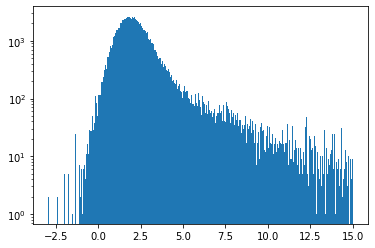

In [172]:
plot_scores(all_pdb_networks,bins=500)

In [173]:
single_network_pdbs = [x for x in all_pdb_networks if x.num_networks() == 1]
double_network_pdbs = [x for x in all_pdb_networks if x.num_networks() == 2]
triple_network_pdbs = [x for x in all_pdb_networks if x.num_networks() == 3]

In [174]:
print(len(single_network_pdbs))
print(len(double_network_pdbs))
print(len(triple_network_pdbs))

69213
37095
5731


In [175]:
len(all_pdb_networks)

112039

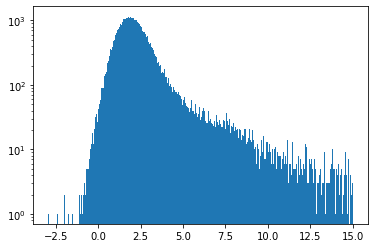

In [176]:
plot_scores(single_network_pdbs,bins=500)

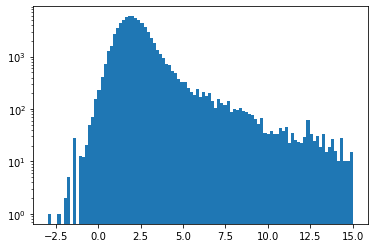

In [177]:
plot_scores(double_network_pdbs,bins=100)

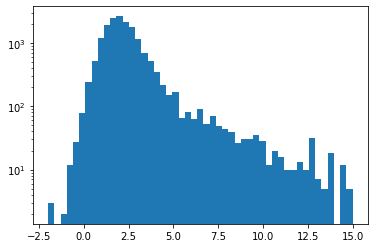

In [178]:
plot_scores(triple_network_pdbs, bins=50)

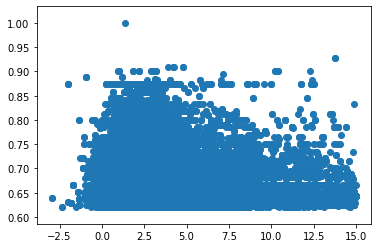

In [179]:
plot_score_vs_connectivity(all_pdb_networks)

In [180]:
for pdb in sorted(triple_network_pdbs, reverse=True, key=lambda x: sum([y[1] for y in x.networks])):
    print(sum([y[1] for y in pdb.networks]))

30.326420000000002
30.27942
30.1729
30.04392
29.197499999999998
28.97972
28.87462
28.7419
28.566200000000002
28.01734
27.953940000000003
27.802170000000004
23.22953
22.57423
22.196800000000003
21.08885
21.00774
20.934669999999997
20.81437
20.76215
20.45762
20.35552
20.145004
20.140620000000002
20.091969999999996
20.00673
19.94837
19.77833
19.53316
19.36018
19.33927
19.30891
19.21872
19.120606
19.04045
18.91119
18.80441
18.7431
18.58625
18.57952
18.46926
18.45106
18.3586
18.3577
18.34025
18.33474
18.324089999999998
18.2566
18.13467
18.113120000000002
18.10732
18.10134
18.04262
17.9908
17.98288
17.9789
17.97547
17.96426
17.90779
17.90734
17.89693
17.89172
17.887140000000002
17.8157
17.77847
17.76786
17.750320000000002
17.67381
17.644669999999998
17.585
17.57798
17.56416
17.56198
17.5438
17.539749999999998
17.5304
17.49578
17.45455
17.45272
17.43842
17.41707
17.33308
17.30348
17.29248
17.24904
17.248530000000002
17.22933
17.206764
17.20623
17.19362
17.141689999999997
17.13102
17.12748
17.

6.843969
6.84327
6.84311
6.8418589999999995
6.8409189999999995
6.839460000000001
6.8354
6.8353
6.833740000000001
6.83137
6.83007
6.82905
6.8290299999999995
6.82803
6.82708
6.82619
6.823600000000001
6.822470000000001
6.8213
6.82027
6.82025
6.819649999999999
6.8192699999999995
6.818119
6.81736
6.8156
6.81337
6.8120899999999995
6.8116
6.81116
6.81099
6.81031
6.807360000000001
6.80562
6.80405
6.80369
6.80206
6.80205
6.801779999999999
6.80109
6.800919
6.79966
6.799580000000001
6.79912
6.799084000000001
6.79851
6.798441
6.79829
6.797409999999999
6.7964
6.79552
6.79444
6.79419
6.79352
6.793279999999999
6.792818
6.79273
6.791690000000001
6.79064
6.78909
6.78814
6.78794
6.7867999999999995
6.784140000000001
6.783619999999999
6.78266
6.78179
6.78163
6.78076
6.78008
6.7798300000000005
6.7795000000000005
6.7771300000000005
6.77639
6.7752
6.77407
6.77331
6.77163
6.771520000000001
6.771229999999999
6.76835
6.76701
6.7666
6.76512
6.76299
6.761329999999999
6.76131
6.760960000000001
6.76044
6.7598199999

4.504066
4.4994879999999995
4.498632
4.49333
4.4926
4.492434
4.491
4.49057
4.4879869999999995
4.4871
4.48626
4.48622
4.484593
4.480395999999999
4.47896
4.478864
4.475632999999999
4.47563
4.474466
4.472871
4.471550000000001
4.4709319999999995
4.46871
4.466499
4.465338
4.462960000000001
4.46271
4.457834
4.45653
4.45533
4.453319
4.453218
4.450581
4.44941
4.44727
4.44695
4.445445
4.445326
4.445162
4.444648
4.44464
4.443538
4.443280000000001
4.442387999999999
4.4392
4.43664
4.43638
4.433073
4.430885
4.42925
4.4276599999999995
4.427528
4.426679999999999
4.42651
4.42454
4.423468
4.420888
4.418819
4.418298
4.417012
4.416232
4.41568
4.41556
4.414607999999999
4.414180999999999
4.41083
4.41081
4.408746
4.40657
4.40461
4.4042764
4.403848
4.401178
4.40114
4.400614
4.399990000000001
4.398213
4.3966400000000005
4.39563
4.39493
4.39486
4.391075
4.390658
4.389519999999999
4.38845
4.383636
4.38333
4.3817699999999995
4.37973
4.3794439999999994
4.378764
4.378599
4.377668
4.376530000000001
4.37411
4.371989

In [181]:
with open("triple_network_pdbs", 'w') as f:
    for pdb in sorted(triple_network_pdbs, reverse=True, key=lambda x: sum([y[1] for y in x.networks])):
        f.write(pdb.path + " ")
        for net in pdb.networks:
            f.write(str(net[1]) + " " + str(net[2]) + " ")
        f.write("\n")

with open("double_network_pdbs", 'w') as f:
    for pdb in sorted(double_network_pdbs, reverse=True, key=lambda x: sum([y[1] for y in x.networks])):
        f.write(pdb.path + " ")
        for net in pdb.networks:
            f.write(str(net[1]) + " " + str(net[2]) + " ")
        f.write("\n")
        
with open("single_network_pdbs", 'w') as f:
    for pdb in sorted(single_network_pdbs, reverse=True, key=lambda x: sum([y[1] for y in x.networks])):
        f.write(pdb.path + " ")
        for net in pdb.networks:
            f.write(str(net[1]) + " " + str(net[2]) + " ")
        f.write("\n")